# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


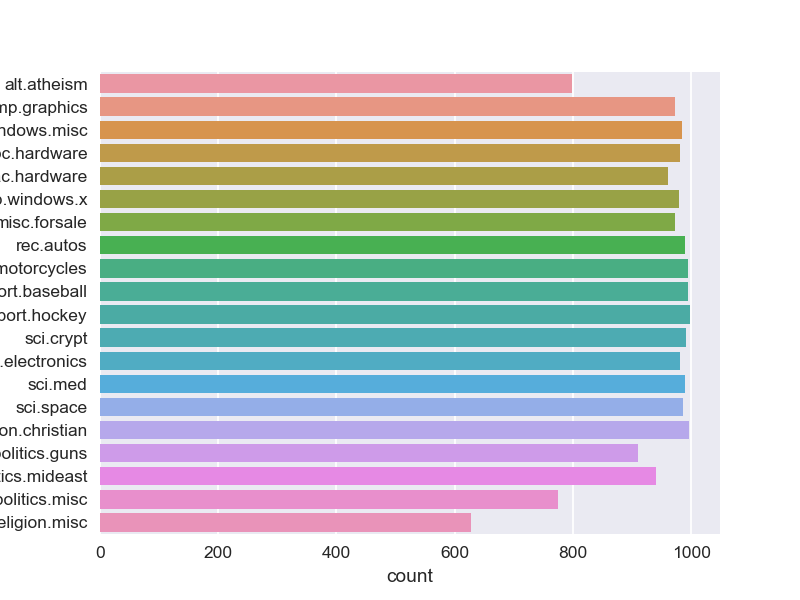

In [ ]:
### count plot of all the class labels. 

##sample document

## Assignment:

In [1]:
!unrar x '/documents.rar'

Streaming output truncated to the last 5000 lines.
Extracting  documents/sci.space_60893.txt                                 66%  OK 
Extracting  documents/sci.space_60894.txt                                 66%  OK 
Extracting  documents/sci.space_60895.txt                                 66%  OK 
Extracting  documents/sci.space_60896.txt                                 66%  OK 
Extracting  documents/sci.space_60897.txt                                 66%  OK 
Extracting  documents/sci.space_60898.txt                                 66%  OK 
Extracting  documents/sci.space_60899.txt                                 66%  OK 
Extracting  documents/sci.space_60900.txt                                 66%  OK 
Extracting  documents/sci.space_60901.txt                                 66%  OK 
Extracting  documents/sci.space_60902.txt                                 66%  OK 
Extracting  documents/sci.spa

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import os 
files=os.listdir('/documents.rar')
text =[]
Class=[]
for f in files:
  name=str(f).split('_')[0]
  Class.append(name.split('.')[-2]+'.'+name.split('.')[-1])
  with open('/documents.rar'+str(f),'r',encoding="ISO-8859-1") as f1:
    my_lines = f1.read()
  text.append(my_lines)

In [ ]:
import pandas as pd
data=pd.DataFrame()
data['text']=text
data['class']=Class
data.head()

,text,class
0,From: julie@eddie.jpl.nasa.gov (Julie Kangas)\...,politics.misc
1,From: scrowe@hemel.bull.co.uk (Simon Crowe)\nS...,comp.graphics
2,From: art@cs.UAlberta.CA (Art Mulder)\nSubject...,windows.x
3,From: rem@buitc.bu.edu (Robert Mee)\nSubject: ...,ms-windows.misc
4,From: kardank@ERE.UMontreal.CA (Kardan Kaveh)\...,comp.graphics


In [ ]:
def mail_text(text):
  h=[]
  #https://stackoverflow.com/questions/17681670/extract-email-sub-strings-from-large-document
  b=re.findall(r'[\w\.-]+@[\w\.-]+\.\w+', text)
  for mail in b:
    d=mail.split('@')[-1].split('.') 
    h.extend(d)
  return ' '.join([w for w in h if len(w)>2])

In [ ]:
def subject_1(text):
  b=re.findall("Subject:.*",text)
  h=re.sub("Subject: Re?",'',b[0])
  d = re.sub('[^A-Za-z0-9]+', ' ',h)
  #remove extra space
  e=re.sub(' +', ' ',d) 

  return e

In [ ]:
def decontracted(phrase):
 # specific
 phrase = re.sub(r"won't", "will not", phrase)
 phrase = re.sub(r"can\'t", "can not", phrase)
 # general
 phrase = re.sub(r"n\'t", " not", phrase)
 phrase = re.sub(r"\'re", " are", phrase)
 phrase = re.sub(r"\'s", " is", phrase)
 phrase = re.sub(r"\'d", " would", phrase)
 phrase = re.sub(r"\'ll", " will", phrase)
 phrase = re.sub(r"\'t", " not", phrase)
 phrase = re.sub(r"\'ve", " have", phrase)
 phrase = re.sub(r"\'m", " am", phrase)
 return phrase

In [ ]:
def chunking(text):
  persion=[]
  gep=[]
  for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
      if hasattr(chunk, 'label'):
        if chunk.label()=='PERSON':
          persion.append(list(chunk))
        if chunk.label()=='GPE' :
          gep.append(list(chunk))
  for i in gep:
    if len(i)==2:
     text=re.sub(i[0][0]+' '+i[1][0],i[0][0]+'_'+i[1][0],text)

  for i in persion:
     if len(i)==2:
       text= re.sub(i[0][0]+' '+i[1][0],'',text)

  return text

In [ ]:
def preprocess(text):

  text=re.sub('[\w\.-]+@[\w\.-]+\.\w+', ' ',text)
  text=re.sub("Subject:.*\w+",'',text)
  #3. Delete all the sentances where sentence starts with "Write to:" or "From:".
  text=re.sub("From:.*?", ' ',text)
  text=re.sub("Write to:.*?",' ',text)

  # 4. Delete all the tags like "< anyword >"
  clean = re.compile('<.*?>')
  text=re.sub(clean,' ',text)

  # 5. Delete all the data which are present in the brackets. 
  clean1 = re.compile('\(.*\)')
  text=re.sub(clean1,'',text)

  #6. Remove all the newlines('\n'), tabs('\t'), "-", "\".
  #https://stackoverflow.com/questions/10711116/strip-spaces-tabs-newlines-python
  text= re.sub(r"[\n\t-]*", "", text)
  
  #text= re.sub('[^A-Za-z0-9]+', ' ',text)
  #Remove all the words which ends with ":".

  text= re.sub(r'\w+:\s?',' ',text)
  text= re.sub('[^A-Za-z0-9]+', ' ',text)
  #Decontractions, replace words like below to full words. 
  #text=re.sub('[^\w\s]',"",text)
  text = decontracted(text)
 
  text = chunking(text)
  text= re.sub("[0-9]+","",text)
  text= re.sub(r"\b_([a-zA-z]+)_\b",r"\1",text) 
   
  text= re.sub(r"\b_([a-zA-z]+)\b",r"\1",text) 
  text= re.sub(r"\b([a-zA-z]+)_\b",r"\1",text) 
  text= re.sub(r"\b[a-zA-Z]{1}_([a-zA-Z]+)",r"\1",text) 
  text= re.sub(r"\b[a-zA-Z]{2}_([a-zA-Z]+)",r"\1",text) 


  text = ' '.join(e.lower() for e in text.split(' '))
  text= ' '.join(e for e in text.split(' ')  if len(e)>2 and len(e)<15)
  
  # replace all the words with space except "A-Za-z_"  
  text= re.sub(r"[^a-zA-Z_]"," ",text) 
  return text

In [ ]:
from tqdm import tqdm
a=[]
b=[]
c=[]

for i in tqdm(range(data.shape[0])):
  a.append(mail_text(data['text'].values[i]))
  b.append(subject_1(data['text'].values[i]))
  c.append(preprocess(data['text'].values[i]))


100%|██████████| 18828/18828 [25:29<00:00, 12.31it/s]


In [ ]:
data['preprocessed_text']=c
data['preprocessed_subject']=b
data['preprocessed_emails']=a

In [ ]:
data.iloc[5]

text                    From: ak333@cleveland.Freenet.Edu (Martin Lins...
class                                                     ms-windows.misc
preprocessed_text       previous article friend mine uses windows most...
preprocessed_subject                              Changing Windows fonts 
preprocessed_emails     cleveland Freenet Edu husc8 harvard edu clevel...
Name: 5, dtype: object

In [ ]:
import pickle
pickle.dump((data),open('/Df.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
with open('/Df.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data.iloc[5]

text                    From: ak333@cleveland.Freenet.Edu (Martin Lins...
class                                                     ms-windows.misc
preprocessed_text       previous article friend mine uses windows most...
preprocessed_subject                              Changing Windows fonts 
preprocessed_emails     cleveland Freenet Edu husc8 harvard edu clevel...
Name: 5, dtype: object

In [ ]:
#text
data['text'].iloc[0]

"From: billc@col.hp.com (Bill Claussen)\nSubject: RE:  alt.psychoactives\n\nFYI...I just posted this on alt.psychoactives as a response to\nwhat the group is for......\n\n\nA note to the users of alt.psychoactives....\n\nThis group was originally a takeoff from sci.med.  The reason for\nthe formation of this group was to discuss prescription psychoactive\ndrugs....such as antidepressents(tri-cyclics, Prozac, Lithium,etc),\nantipsychotics(Melleral(sp?), etc), OCD drugs(Anafranil, etc), and\nso on and so forth.  It didn't take long for this group to degenerate\ninto a psudo alt.drugs atmosphere.  That's to bad, for most of the\nserious folks that wanted to start this group in the first place have\nleft and gone back to sci.med, where you have to cypher through\nhundreds of unrelated articles to find psychoactive data.\n\nIt was also to discuss real-life experiences and side effects of\nthe above mentioned.\n\nOh well, I had unsubscribed to this group for some time, and I decided\nto chec

In [ ]:
#preprocessed_emails:
data['preprocessed_emails'].iloc[0]

'col com'

In [ ]:
#preprocessed_subject
data['preprocessed_subject'].iloc[0]


'E alt psychoactives'

In [ ]:
#preprocessed_text
data['preprocessed_text'].iloc[0]

'fyi just posted this alt psychoactives response towhat the group for note the users alt psychoactives this group was originally takeoff from sci med the reason forthe formation this group was discuss prescription such antipsychotics andso and forth didn take long for this group degenerateinto psudo alt drugs atmosphere that bad for most theserious folks that wanted start this group the first place haveleft and gone back sci med where you have cypher unrelated articles find psychoactive data was also discuss reallife experiences and side effects ofthe above mentioned well had unsubscribed this group for some time and decidedto check today see anything had changed nope same oldnine ten crap articles that this group was never intended for think very hard have meaningfull group without itbeing moderated too bad well obviously one really cares would anyone interested starting similar moderated group'

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [ ]:
train_data=data['preprocessed_emails']+data['preprocessed_subject']+data['preprocessed_text']

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,data['class'], test_size=0.25, stratify=data['class'])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Activation,BatchNormalization,Dropout,Embedding,LSTM,Flatten,Conv1D,MaxPool1D
from tensorflow.keras.models import Model
import random as rn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint ,TensorBoard,EarlyStopping,LearningRateScheduler
from keras.preprocessing import sequence
from tensorflow.keras.layers import concatenate


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_ohe = tf.keras.utils.to_categorical(y_train_encoded)
y_test_ohe = tf.keras.utils.to_categorical(y_test_encoded)

In [ ]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(14121, 20)
(4707, 20)


In [ ]:
length_of_text=[]
for i in range(X_train.shape[0]):
  length_of_text.append(len(X_train.iloc[i]))

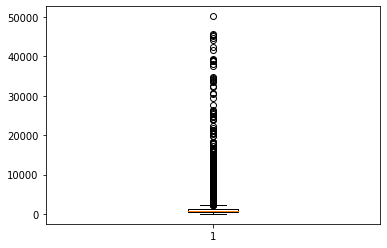

In [ ]:
#box plot of length of text
import matplotlib.pyplot as plt
plt.boxplot(length_of_text)
plt.show()

In [ ]:
#max length
print('max length of text : ',max(length_of_text))
#mean length
import statistics
print('mean length of text : ',statistics.mean(length_of_text) )
# return 50th percentile, e.g median.
import numpy as np
a = np.array(length_of_text)
p = np.percentile(a, 90) 
print('90th percentile of text :',p)

max length of text :  50198
mean length of text :  1182.874583952978
90th percentile of text : 2125.0


In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n')
tokenizer.fit_on_texts(X_train.tolist())
train_token = tokenizer.texts_to_sequences(X_train)
test_token = tokenizer.texts_to_sequences(X_test)

In [ ]:
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)

159015


In [ ]:
max_review_length = 2000
X_train_seq = sequence.pad_sequences(train_token, maxlen=max_review_length)
X_test_seq = sequence.pad_sequences(test_token , maxlen=max_review_length)

In [ ]:
import pickle

In [ ]:
!wget --header="Host: doc-0o-34-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Cookie: AUTH_1577et9lmrsd5s737cb0g0n536tvbcbs_nonce=p847le4mhs0ag" --header="Connection: keep-alive" "https://doc-0o-34-docs.googleusercontent.com/docs/securesc/rhuhjvv7n66kuhi9oc87n44ngjad4ijb/pn39mmm0g07dumpgv9djno8p8of74blo/1601690850000/06629147635963609455/14084173634687362184/1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j?e=download&authuser=0&nonce=p847le4mhs0ag&user=14084173634687362184&hash=gtlh3t9ilu25hgm9g6pm60dgn14f1f5i" -c -O 'glove_vectors'

--2020-10-03 02:08:58--  https://doc-0o-34-docs.googleusercontent.com/docs/securesc/rhuhjvv7n66kuhi9oc87n44ngjad4ijb/pn39mmm0g07dumpgv9djno8p8of74blo/1601690850000/06629147635963609455/14084173634687362184/1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j?e=download&authuser=0&nonce=p847le4mhs0ag&user=14084173634687362184&hash=gtlh3t9ilu25hgm9g6pm60dgn14f1f5i
Resolving doc-0o-34-docs.googleusercontent.com (doc-0o-34-docs.googleusercontent.com)... 108.177.98.132, 2607:f8b0:400e:c06::84
Connecting to doc-0o-34-docs.googleusercontent.com (doc-0o-34-docs.googleusercontent.com)|108.177.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove_vectors’

glove_vectors           [         <=>        ] 121.60M  30.4MB/s    in 4.0s    

2020-10-03 02:09:02 (30.4 MB/s) - ‘glove_vectors’ saved [127506004]



In [ ]:
# Load the glove vectors:
with open('/glove_vectors', 'rb') as f:
    glove_words= pickle.load(f)

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/03/pretrained-word-embeddings-nlp/

embedding_matrix = np.zeros((size_of_vocabulary, 300)) # creating weight matrix for words:

for word, j in tokenizer.word_index.items():
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[j] = embedding_vector

### Model-1: Using 1D convolutions with word embeddings

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [ ]:
tf.keras.backend.clear_session()
#input layer 
input = Input(shape=(2000,))

#embedding layer
embedding = Embedding(size_of_vocabulary,300,weights=[embedding_matrix],input_length=2000,trainable=False)(input)

#Conv Layer
Conv1m = Conv1D(filters=20,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=34),kernel_regularizer=l2(0.00001),
                                            name='Conv1m')(embedding)
#Conv Layer              
Conv1n= Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=35),kernel_regularizer=l2(0.00001),
                                            name='Conv1n')(embedding)

#conv Layer
Conv1o = Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=36),kernel_regularizer=l2(0.00001),
                                            name='Conv1o')(embedding)
#concatination
concat1 = concatenate([Conv1m,Conv1n,Conv1o])
drop =Dropout(0.15)(concat1)
batch_norm=BatchNormalization()(drop)

#MaxPool Layer
Pool1 = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='Pool1')(batch_norm)

#Conv Layer
Conv2i = Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.00001),
                                               name='Conv2i')(Pool1)
#Conv Layer              
Conv2j= Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=31),kernel_regularizer=l2(0.00001),
                                                        name='Conv2j')(Pool1)
#conv Layer
Conv2k = Conv1D(filters=14,kernel_size=3,strides=1,padding='valid',data_format='channels_last',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=32),kernel_regularizer=l2(0.00001),name='Conv2k')(Pool1)

#now concatenate  
concat2 = concatenate([Conv2i,Conv2j,Conv2k])

#drop=Dropout(0.0)(concat2)
batch_norm = BatchNormalization()(concat2) 

#maxpool layer
MaxPool2 = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='MaxPool2')(batch_norm)

#Conv Layer
Conv3p = Conv1D(filters=32,kernel_size=3,strides=1,padding='valid',data_format='channels_last',kernel_regularizer=l2(0.0001), activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=33),name='Conv1p')(MaxPool2)

drop1 =Dropout(0.35)(Conv3p)

#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(drop1)
#x1 = Dense(8,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.01))(flatten)
#x2 = Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.01))(flatten)
#x3 = Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.01))(flatten)
#concat3 = concatenate([x1,x2,x3])
# dense layer3                                                                                    
x = Dense(100,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(flatten)
x  =  Dropout(0.25)(x)
x   = BatchNormalization()(x)
x = Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(x)
x  =  Dropout(0.35)(x)
x   = BatchNormalization()(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(x)
x   = BatchNormalization()(x)

#output layer
Out = Dense(units=20,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(x)
model11= Model(inputs=input,outputs=Out)            


In [ ]:
model11.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 300)    47704500    input_1[0][0]                    
__________________________________________________________________________________________________
Conv1m (Conv1D)                 (None, 1998, 20)     18020       embedding[0][0]                  
__________________________________________________________________________________________________
Conv1n (Conv1D)                 (None, 1998, 16)     14416       embedding[0][0]                  
_______________________________________________________________________________________

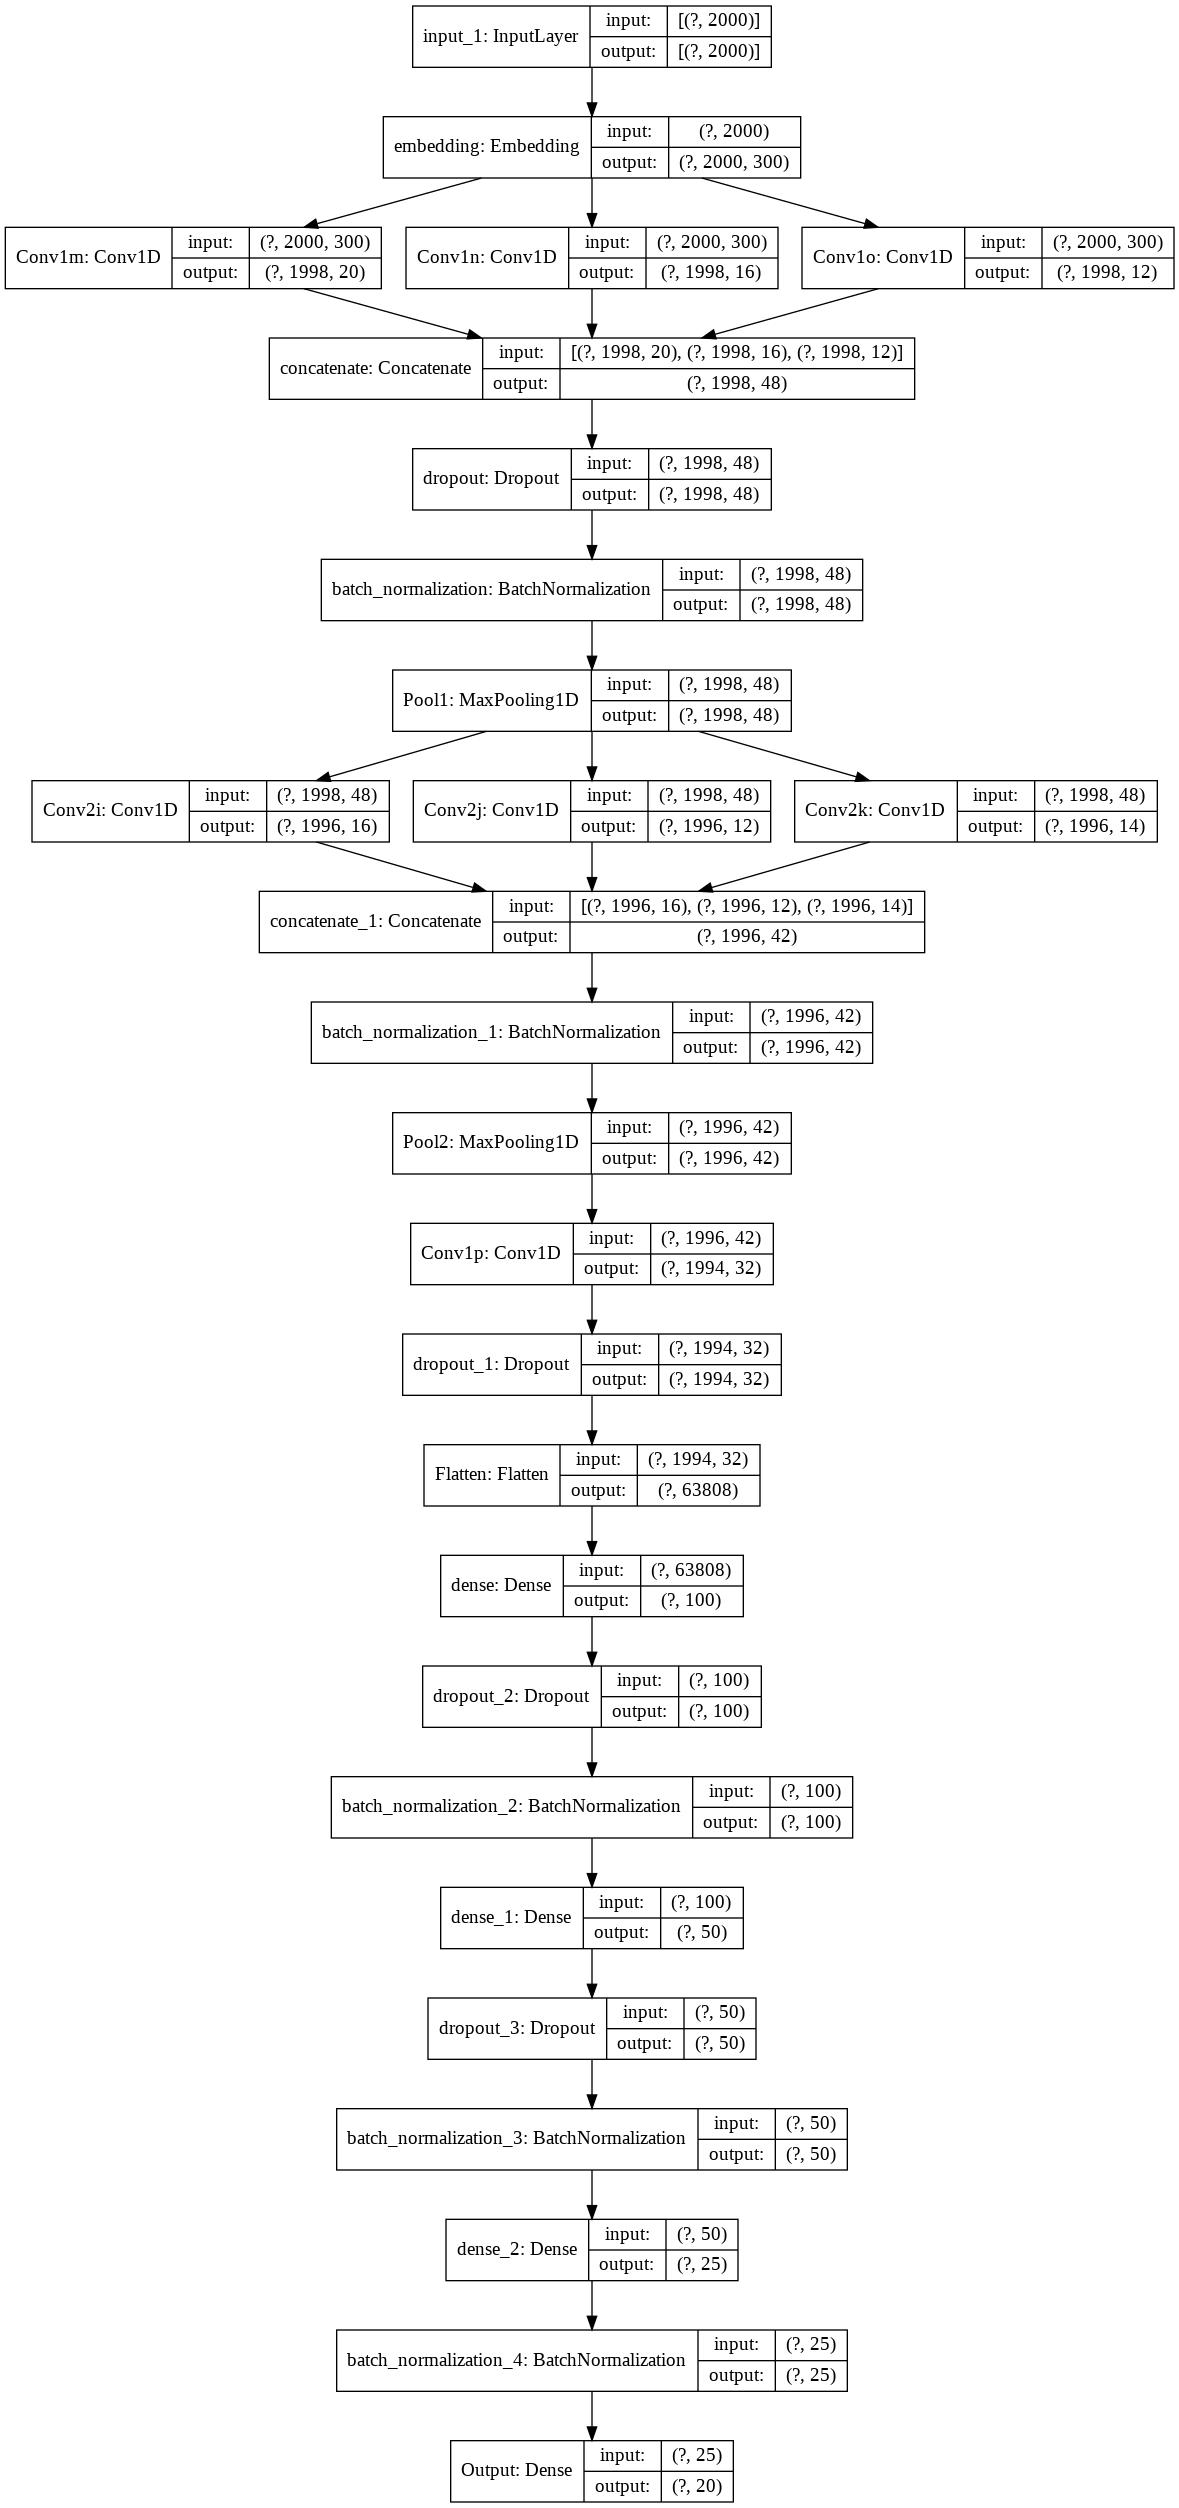

In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model11, 'model.png', show_shapes=True)

In [ ]:
import tensorflow as tf
import keras.backend as K
import os 
import datetime

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [ ]:
def changeLearningRate(epochs,learning_rate):
  if epochs<40:
    learning_rate=0.0001
    return learning_rate
  else :
    learning_rate=0.00001
    return learning_rate
lrschedule = LearningRateScheduler(changeLearningRate)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model11.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1])

In [ ]:
#earlystop
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=4, verbose=1)
#model 'best_model_L.h5'
filepath="best_model_L1.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')


In [ ]:
from keras.callbacks import TensorBoard
model11.fit(X_train_seq,y_train_ohe,epochs=100, validation_data=(X_test_seq,y_test_ohe), batch_size=64, callbacks=[checkpoint,tensorboard_callback,earlystop,lrschedule])

Epoch 1/100
  1/221 [..............................] - ETA: 0s - loss: 3.5602 - accuracy: 0.0781 - f1: 0.0250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
221/221 [==============================] - ETA: 0s - loss: 3.6888 - accuracy: 0.0608 - f1: 0.0013
Epoch 00001: val_accuracy improved from -inf to 0.05927, saving model to best_model_L1.h5
221/221 [==============================] - 25s 112ms/step - loss: 3.6888 - accuracy: 0.0608 - f1: 0.0013 - val_loss: 3.4342 - val_accuracy: 0.0593 - val_f1: 0.0000e+00
Epoch 2/100
221/221 [==============================] - ETA: 0s - loss: 3.4988 - accuracy: 0.0719 - f1: 0.0022
Epoch 00002: val_accuracy improved from 0.05927 to 0.05991, saving model to best_model_L1.h5
221/221 [==============================] - 24s 108ms/s

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

In [ ]:
import re

In [ ]:
def corpus(x):
  x= x.lower()
  x= re.sub(r"[^a-z_]"," ",x)
  x=re.sub(' ','',x)
  return x

In [ ]:
X_char=[]
for i in range(X_train.shape[0]):
  X_char.append(corpus(X_train.iloc[i]))

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

tokenizer=tf.keras.preprocessing.text.Tokenizer(char_level=True,filters='!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n')
tokenizer.fit_on_texts(X_char)
train_token = tokenizer.texts_to_sequences(X_train)
test_token = tokenizer.texts_to_sequences(X_test)

In [ ]:
size_of_vocabulary_char=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary_char)

28


In [ ]:
len_char=[]
for i in range(X_train.shape[0]):
    a=len(re.sub(' ',"",X_train.iloc[i]))
    len_char.append(a)

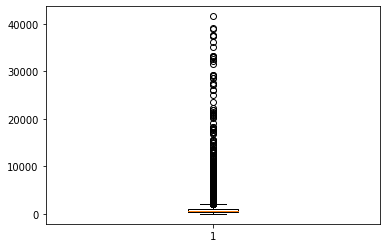

In [ ]:
#box plot of length of text
import matplotlib.pyplot as plt
plt.boxplot(len_char)
plt.show()

In [ ]:
#max length
print('max length of text : ',max(len_char))
#mean length
import statistics
print('mean length of text : ',statistics.mean(len_char) )
# return 50th percentile, e.g median.
import numpy as np
a = np.array(len_char)
p = np.percentile(a, 90) 
print('90th percentile of text :',p)

max length of text :  41629
mean length of text :  997.0806600099144
90th percentile of text : 1789.0


In [ ]:
# truncate and/or pad input sequences
max_review_length = 1800
X_train_seq_char = sequence.pad_sequences(train_token, maxlen=max_review_length)
X_test_seq_char = sequence.pad_sequences(test_token , maxlen=max_review_length)

In [ ]:
input = Input(shape=(1800,))
Embedding_layer= Embedding(input_dim= 1800,output_dim= 50,embeddings_initializer='uniform' )(input)
drop_new1=Dropout(0.1)(Embedding_layer)


#conv layer
Convm = Conv1D(filters=128,kernel_size=5,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                 kernel_regularizer=l2(0.00001),name='Convm')(drop_new1)

#Conv Layer
Convn = Conv1D(filters=64,kernel_size=5,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                                      kernel_regularizer=l2(0.00001),name='Convn')(Convm)

#MaxPool Layer
Pool1 = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='Pool1')(Convn)
batch_norm = BatchNormalization()(Pool1)  
 

drop_new2=Dropout(0.25)(batch_norm)

#conv layer
Convk = Conv1D(filters=32,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                          kernel_regularizer=l2(0.00001),name='Convk')(drop_new2)

#Conv Layer
Convt = Conv1D(filters=16,kernel_size=1,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                                 kernel_regularizer=l2(0.00001),name='Convt')(Convk)

#MaxPool Layer
Pool2 = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='Pool2')(Convt)
batch_norm = BatchNormalization()(Pool2)


drop1 =Dropout(0.25)(batch_norm)

#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(drop1)

drop2 =Dropout(0.25)(flatten)

batch_norm = BatchNormalization()(drop2)  

# dense layer3                                                                                    
dense = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30))(batch_norm)
#output layer
Out = Dense(units=20,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(dense)
model2= Model(inputs=input,outputs=Out)         

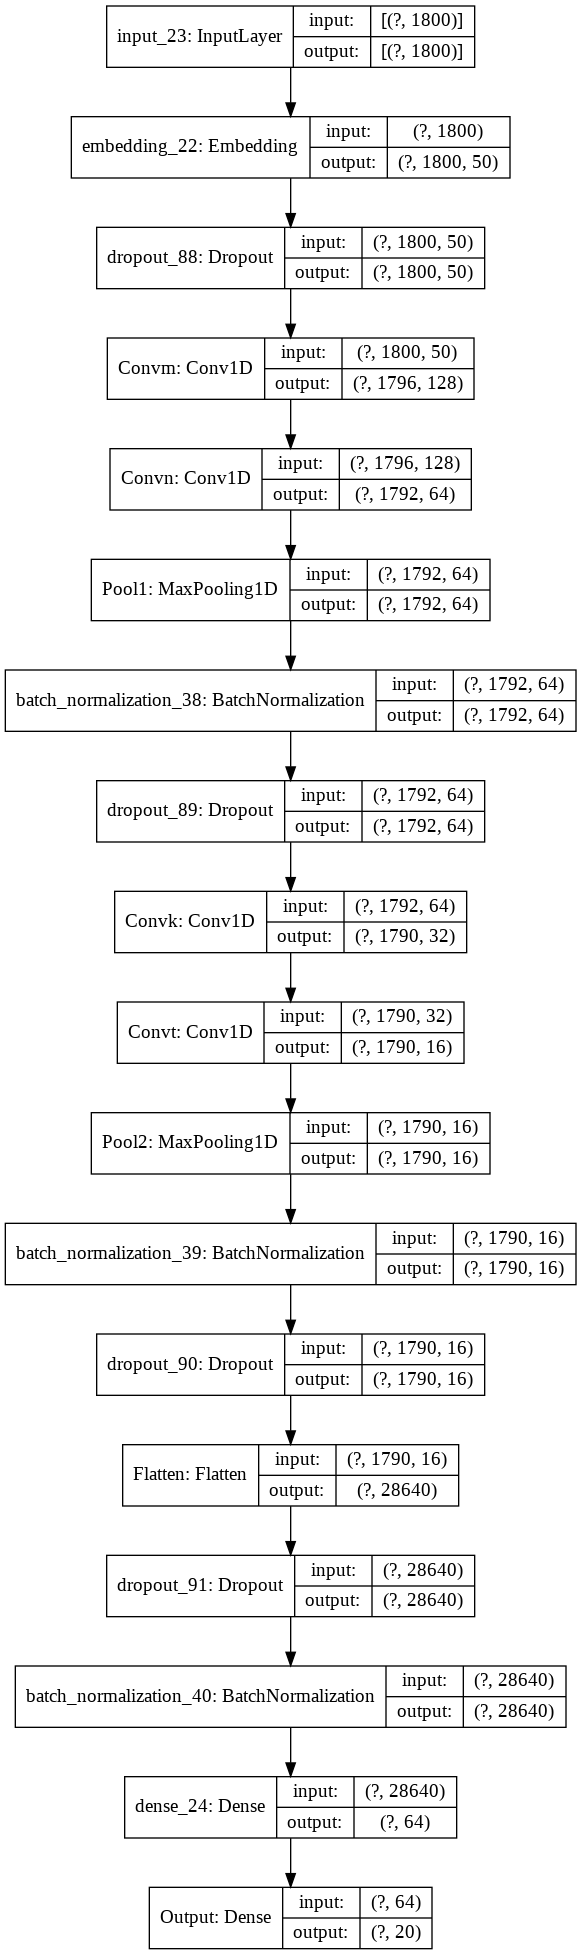

In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model2, 'model.png', show_shapes=True)

In [ ]:
model2.summary()

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 1800)]            0         
_________________________________________________________________
embedding_22 (Embedding)     (None, 1800, 50)          90000     
_________________________________________________________________
dropout_88 (Dropout)         (None, 1800, 50)          0         
_________________________________________________________________
Convm (Conv1D)               (None, 1796, 128)         32128     
_________________________________________________________________
Convn (Conv1D)               (None, 1792, 64)          41024     
_________________________________________________________________
Pool1 (MaxPooling1D)         (None, 1792, 64)          0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 1792, 64)        

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1])

In [ ]:
#earlystop
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=4, verbose=1)
#model 'best_model_L.h5'
filepath="best_model_L2.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')


In [ ]:
model2.fit(X_train_seq_char,y_train_ohe,epochs=25, validation_data=(X_test_seq_char,y_test_ohe), batch_size=64,
           callbacks=[earlystop,checkpoint,tensorboard_callback])

Epoch 1/25
220/221 [============================>.] - ETA: 0s - loss: 3.5003 - accuracy: 0.0577 - f1: 0.0039
Epoch 00001: val_accuracy improved from -inf to 0.05141, saving model to best_model_L2.h5
221/221 [==============================] - 14s 62ms/step - loss: 3.5005 - accuracy: 0.0577 - f1: 0.0039 - val_loss: 3.0740 - val_accuracy: 0.0514 - val_f1: 0.0000e+00
Epoch 2/25
220/221 [============================>.] - ETA: 0s - loss: 3.3809 - accuracy: 0.0648 - f1: 0.0030
Epoch 00002: val_accuracy improved from 0.05141 to 0.07096, saving model to best_model_L2.h5
221/221 [==============================] - 13s 60ms/step - loss: 3.3809 - accuracy: 0.0649 - f1: 0.0030 - val_loss: 3.0448 - val_accuracy: 0.0710 - val_f1: 0.0000e+00
Epoch 3/25
220/221 [============================>.] - ETA: 0s - loss: 3.3418 - accuracy: 0.0722 - f1: 0.0044
Epoch 00003: val_accuracy improved from 0.07096 to 0.07521, saving model to best_model_L2.h5
221/221 [==============================] - 13s 60ms/step - loss

In [3]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["Model1",'Features','train_accuracy','test_acurray']
ptable.add_row(["model1","word_embedding","0.78","0.672"])
ptable.add_row(["model2","character_embedding","1.452",".0954"])

print(ptable)

+--------------------------------------------------------------+
|                      Model Comparision                       |
+--------+---------------------+----------------+--------------+
| Model1 |       Features      | train_accuracy | test_acurray |
+--------+---------------------+----------------+--------------+
| model1 |    word_embedding   |      0.78      |    0.672     |
| model2 | character_embedding |     1.452      |    .0954     |
+--------+---------------------+----------------+--------------+
